# Learning outcomes
- Geometric transformation
 - rotation
 - translation
 - affine transformation
 - perspective transformation

- Basic drawing functions
 - line
 - circle
 - ellipse
 - rectangle
 - text
 
- Bitwise operation
 - OR
 - XOR
 - AND
 - NOT
 
- Convolution: sliding window performing linear combination
 - Image smoothing(denosing)
 - Sharpening
 - at the heart of CNN
 - other effects

In [1]:
import sys
# assert Python 3.7 or later is required
assert sys.version_info >= (3, 7)
import cv2 as cv
import numpy as np
from util_func import *
# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    cv.useOptimized()

# Translation

In [5]:
img = cv.imread('images/lena.jfif')

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1,0,tx],[0,1,ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img(f"translation tx:{tx}, ty:{ty}", dst)

# Rotation

In [11]:
# define M: center, angle and scale
yc, xc = h //2, w//2

#anti-clockwise
angle = 45

M = cv.getRotationMatrix2D((xc,yc),angle,1)
dst = cv.warpAffine(img, M,(w,h))

show_img("rotation",dst)

# Custom affine transform

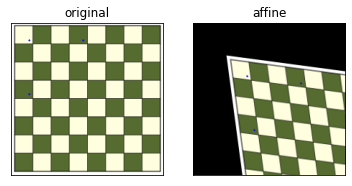

In [27]:
img = cv.imread('images/chessboard.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_copy = img.copy()
h,w = img.shape[:2]


p0 = np.float32([[25,25],[100,25],[25,100]])
p1 = np.float32([[75,75],[150,85],[85,150]])

for pt in p0:
    cv.circle(img,(int(pt[0]), int(pt[1])),1,(0,0,255), -1)
    
M = cv.getAffineTransform(p0,p1)
dst = cv.warpAffine(img,M,(w,h))

plt.subplot(121), plt_img(img,title="original")
plt.subplot(122), plt_img(dst, title="affine")
plt.show()

In [28]:
#dst[75,75,:]
dst[150,85,:]

array([  0,   0, 255], dtype=uint8)

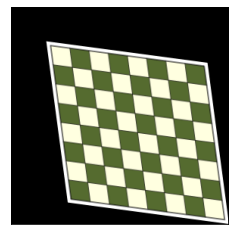

In [20]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

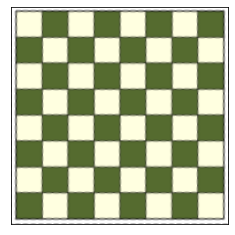

In [21]:
M_inv = cv.getAffineTransform(p1,p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w,h))

plt_img(ori_restored)

# Perspective transform

In [32]:
img = cv.imread('images/name_card_sample.webp')
img_copy = img.copy()
show_img("img",img, adjust = True)

In [33]:
# get the 4 points
p = []

def mouse(event, x, y,flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img,(x,y),2,(0,0,255),-1)
        cv.imshow("img", img)
        
cv.imshow("img",img)
cv.setMouseCallback("img",mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(116, 105)
(767, 46)
(914, 269)
(70, 386)


In [15]:
!pip install scipy

In [16]:
from scipy.spatial.distance import euclidean

In [35]:
w1 = euclidean(p[0],p[1])
w2 = euclidean(p[2],p[3])

h1 = euclidean(p[0],p[3])
h2 = euclidean(p[1],p[2])

W = max(w1,w2)
H = max(h1,h2)

p_arr = np.float32(p)
dst = np.float32([[0,0],[W-1,0],[W-1,H-1],[0,H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy,M,(int(W),int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp",warp)

# Drawing functions

In [36]:
#Line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [37]:
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150,150), (0,0,255),4,cv.LINE_AA)
show_img("line", img_copy)

In [38]:
#Circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0,0,255),2,cv.LINE_AA)
show_img("circle", img_copy)

In [39]:
#Ellipse
img_copy = img.copy()
axes = (25,50)
angle = 90

cv.ellipse(img_copy, (145, 50), axes, angle,0,360,(100,0,100),2,cv.LINE_AA)
show_img("ellipse", img_copy)

In [40]:
#Rectangle
img_copy = img.copy()
axes = (25,50)
angle = 90

cv.rectangle(img_copy, (30, 80), (150,150), (0,0,255),4,cv.LINE_AA)
show_img("rectangle", img_copy)

In [41]:
#text
img_copy = img.copy()
axes = (25,50)
angle = 90

cv.putText(img_copy, "I am a happy dog", (15,145),cv.FONT_HERSHEY_SIMPLEX,0.65,(200,0,50),2)
show_img("font", img_copy)

# create a custom drawing board
Trackbar function, mouse callback function.

In [43]:
WHITE =(255,255,255)
RED = (0,0,255)
GREEN = (0,255,0)
BLUE = (255,0,0)
CYAN = (255,255,0)
MAGENTA = (255,0,255)
YELLOW = (0,255,255)

colors = (RED,GREEN,BLUE,CYAN,MAGENTA,YELLOW,WHITE)

#create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0 = p1 = (0,0)

def mouse(event,x,y,flags,params):
    global p0,p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x,y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x,y)
        
        d = cv.getTrackbarPos(tr1_name,wn)
        if d == 0:
             d=-1
        i = cv.getTrackbarPos(tr2_name,wn)
        color = colors[i]
        cv.rectangle(img,p0,p1,color,d)
        cv.imshow(wn, img)

wn = "Window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400,400,3), dtype = np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name,wn,0,10,nothing)
cv.createTrackbar(tr2_name,wn,0,6,nothing)
cv.setMouseCallback(wn,mouse)


while(1):
    cv.imshow(wn,img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

In [45]:
#Bulleyes
img = np.zeros((400,400), dtype = np.uint8)

yc, xc = img.shape[0] //2, img.shape[1] //2
radius = np.arange(20,200,15)

for r in radius: 
    cv.circle(img, (xc, yc), r, 255,2)
    
cv.putText(img, "Bulleye", (20,375),cv.FONT_HERSHEY_SIMPLEX, 0.65,255,2)

show_img("img",img)

# Bitwise operation

In [2]:
rect = np.zeros((400,400), np.uint8)
rect[30:370,30:370] = 255

circle = np.zeros((400,400), np.uint8)
cv.circle(circle,(200,200),200,255,-1)

cv.imshow("rectangle",rect)
show_img("circle",circle)

In [3]:
#AND
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [7]:
#OR
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [5]:
#XOR
res_xor = cv.bitwise_xor(rect, circle)
show_img("XOR", res_xor)

In [ ]:
#NOT
res_not = cv.bitwise_not(rect)
show_img("NOT", res_not)

In [8]:
#
img = cv.imread("images/dog.jfif")
h,w = img.shape[:2]

mask = np.zeros((h,w),dtype = np.uint8)

cv.circle(mask,(145,50), 40 ,255,-1)

res = cv.bitwise_and(img,img,mask = mask)

show_img("res",res)

# Convolution

In [4]:
#identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3,3))
kernel[1,1] = 1
print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity",dst)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [7]:
#sharpening kernel
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity",dst)

In [9]:
#blur
kernel = np.ones((5,5))/ 25

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur,-0.6,0)

show_img("unsharp_masking",dst)

# 4 functions to perform image blurring
- `cv.blur`: mean average filter
- `cv.GaussianBlur`: Gaussian filter, suitable for gaussian noise
- `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise
- `cv.bilateralFilter`: edge-preserving filter

# Weekly Activity
# Exercise 1

In [2]:
pip install imutils

In [3]:
img = cv.imread('images/lena.jfif')

#Modify the transformation matrix.
h, w = img.shape[:2]

# define M: center, angle and scale
yc, xc = h //2, w//2

#anti-clockwise
angle = -45

M = cv.getRotationMatrix2D((xc,yc),angle,1)
dst = cv.warpAffine(img, M,(w,h))

show_img("rotation",dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
#Use external libraries imutils
import imutils


rotated_image = imutils.rotate_bound(img, angle=45)

show_img("original",img)
show_img("rotation",rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 2

(-0.5, 499.5, 499.5, -0.5)

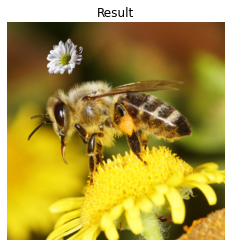

In [5]:
image1 = cv.imread('images/native-bee.png')
image2 = cv.imread('images/flower.jfif')

# Create ROI in image1 for overlaying flower
w, h, channels = image2.shape
roi = image1[0:w, 0:h]

#convert the flower image to grayscale
flower_gray = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Apply thresholding to segment the flower from the image2
_, mask = cv.threshold(flower_gray, 80, 255, cv.THRESH_BINARY)

#Invert the mask (image1 becomes white, flower becomes black)
mask_inv = cv.bitwise_not(mask)

# Isolates the part of the ROI where the flower will not be place
bee_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

#Extract the flower region from the flower image using the mask
flower = cv.bitwise_and(image2, image2, mask = mask)

#Combine the 2 images together and place on the original image
result = cv.add(bee_bg, flower)
image1[0:w, 0:h] = result

# Display the result
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")

# Exercise 3

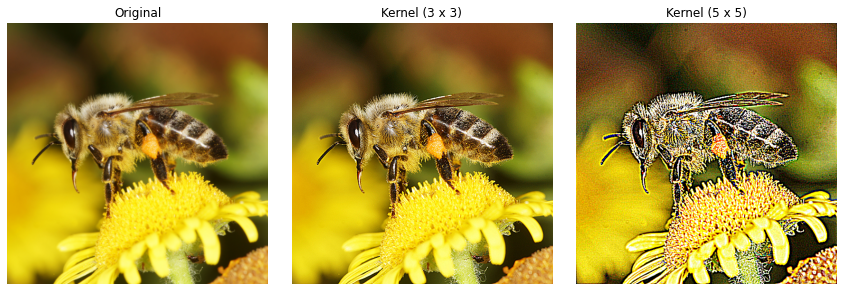

In [6]:
# Read image
img = cv.imread("images/native-bee.png")

#Define custom sharpening kernels
kernel_3 = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

kernel_5 = np.array([[-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1],
                     [-1, -1, 25, -1, -1],
                     [-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1]])

#Apply custome sharpening kernels
kernel_3 = cv.filter2D(img, -1, kernel_3)
kernel_5 = cv.filter2D(img, -1, kernel_5)

# Display
plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(kernel_3, cv.COLOR_BGR2RGB))
plt.title("Kernel (3 x 3)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(kernel_5, cv.COLOR_BGR2RGB))
plt.title("Kernel (5 x 5)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Exercise 4

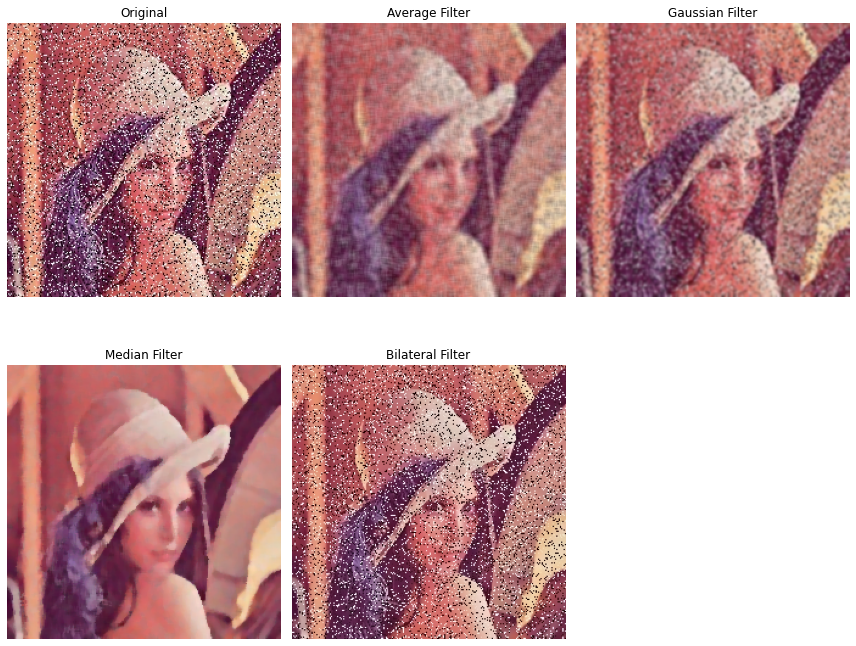

In [7]:
# Read noisy image
img = cv.imread("images/noise_lena.jpg")

# Apply average filter
blur = cv.blur(img, (5, 5))

#Apply Gaussian Filter
gaussian = cv.GaussianBlur(img, (5, 5), 0)

# Apply Median Filter
median = cv.medianBlur(img, 5)

# Apply bilateral filter
bilateral = cv.bilateralFilter(img, 9, 75, 75)

# Display
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
plt.title("Average Filter")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(gaussian, cv.COLOR_BGR2RGB))
plt.title("Gaussian Filter")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(median, cv.COLOR_BGR2RGB))
plt.title("Median Filter")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(bilateral, cv.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis("off")

plt.tight_layout()
plt.show()